In [1]:
from tensorflow.keras.layers import Add,Dense,Activation,ZeroPadding2D,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, ReLU, Dense, Input, InputLayer, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB5
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set(font_scale=1.4)
from  matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.utils import shuffle
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np 
import shutil
import random
import cv2 
import os

In [2]:
import tensorflow_datasets as tfds
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import inspect
from tqdm import tqdm
import numpy as np
import os
import tensorflow as tf
import sys
import cv2
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import categorical_crossentropy
# Set batch size for training and validation
batch_size = 32

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
len(tf.config.list_physical_devices('GPU'))>0

True

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
#THis for loop if for having more number of GPUs 
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr

In [7]:
model_dictionary = {m[0]:m[1] for m in inspect.getmembers(tf.keras.applications, inspect.isfunction)}
model_dictionary

{'DenseNet121': <function keras.applications.densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 'DenseNet169': <function keras.applications.densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 'DenseNet201': <function keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 'EfficientNetB0': <function keras.applications.efficientnet.EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)>,
 'EfficientNetB1': <function keras.applications.efficientnet.EfficientNetB1(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None,

In [8]:

model_dictionary = dict(itertools.islice(model_dictionary.items(),36,66))

print(model_dictionary)

{'RegNetX160': <function RegNetX160 at 0x000002C06AA28B80>, 'RegNetX320': <function RegNetX320 at 0x000002C06AA28C10>, 'RegNetY002': <function RegNetY002 at 0x000002C06AA28CA0>, 'RegNetY004': <function RegNetY004 at 0x000002C06AA28D30>, 'RegNetY006': <function RegNetY006 at 0x000002C06AA28DC0>, 'RegNetY008': <function RegNetY008 at 0x000002C06AA28E50>, 'RegNetY016': <function RegNetY016 at 0x000002C06AA28EE0>, 'RegNetY032': <function RegNetY032 at 0x000002C06AA28F70>, 'RegNetY040': <function RegNetY040 at 0x000002C06AA29000>, 'RegNetY064': <function RegNetY064 at 0x000002C06AA29090>, 'RegNetY080': <function RegNetY080 at 0x000002C06AA29120>, 'RegNetY120': <function RegNetY120 at 0x000002C06AA291B0>, 'RegNetY160': <function RegNetY160 at 0x000002C06AA29240>, 'RegNetY320': <function RegNetY320 at 0x000002C06AA292D0>, 'ResNet101': <function ResNet101 at 0x000002C06A9F67A0>, 'ResNet101V2': <function ResNet101V2 at 0x000002C06A9F6B00>, 'ResNet152': <function ResNet152 at 0x000002C06A9F6830>

In [9]:
#image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
'''def clearing_image(data_dir):
    for image_class in os.listdir(data_dir): 
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path))
            # os.remove(image_path)'''

"def clearing_image(data_dir):\n    for image_class in os.listdir(data_dir): \n        for image in os.listdir(os.path.join(data_dir, image_class)):\n            image_path = os.path.join(data_dir, image_class, image)\n            try: \n                img = cv2.imread(image_path)\n                tip = imghdr.what(image_path)\n                if tip not in image_exts: \n                    print('Image not in ext list {}'.format(image_path))\n                    os.remove(image_path)\n            except Exception as e: \n                print('Issue with image {}'.format(image_path))\n            # os.remove(image_path)"

In [11]:
#'''clearing_image(r'C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train')'''

In [7]:
class_names = ['buildings', 'forest', 'glacier', 'mountain',  'sea', 'street']
class_names_label = {class_name:i for (i, class_name) in enumerate(class_names)}
nb_c1asses = len(class_names)
print(class_names_label)
IMAGE_SIZE = (150, 150)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [8]:
def load_data():
    DIRECTORY = r'C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data'
    CATEGORY = ['train','test']
    output = []
    
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        images = []
        labels = []
        
        print("Loading {} ".format(category))
        for folder in os.listdir(path):
            print("/ "+folder)
            label = class_names_label[folder]
            #label = class_names_label[folder]
            print(label)
            for file in os.listdir(os.path.join(path, folder)):
                img_path = os.path.join(os.path.join(path, folder), file)
                print(img_path)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                images.append(image)
                labels.append(label)
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
    return output

In [9]:
(train_images, train_labels), (test_images, test_labels) = load_data()
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Loading train 
/ buildings
0
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\0.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1001.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1009.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1012.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1028.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1041.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1045.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1055.jpg
C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train\buildings\1058.jpg
C:\Users\abulf\Documents\Pyth

In [13]:
#train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
'''from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_images, train_labels, test_size=0.2)'''

In [12]:
'''print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((test_images.shape,test_labels.shape))'''

((1440, 150, 150, 3), (1440,))
((360, 150, 150, 3), (360,))
((3000, 150, 150, 3), (3000,))


In [13]:
'''train_generator = ImageDataGenerator(featurewise_std_normalization=True, rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(featurewise_std_normalization=True, rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(featurewise_std_normalization=True, rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(test_images)'''

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\preprocessing\image.py:1297: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [14]:
#lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

In [11]:
base_model = EfficientNetB5(include_top=False, weights="imagenet", input_shape=(150,150,3),classes=6)

In [12]:
model= Sequential()
model.add(base_model) 
#model.add(Dropout(.4))
model.add(Flatten()) 
#model.add(Dense(64,activation=('relu'))) 
#model.add(Dropout(.2))
#model.add(Dense(128,activation=('relu')))
model.add(Dense(6,activation=('softmax')))
#Defining the parameters
#batch_size= 64
#epochs=25
#learn_rate=.001
adam=Adam(learning_rate=0.0000001)
#Compiling the model
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 5, 5, 2048)       28513527  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 6)                 307206    
                                                                 
Total params: 28,820,733
Trainable params: 28,647,990
Non-trainable params: 172,743
_________________________________________________________________


In [13]:
%%timeit -n1 -r1 
#with tf.device('/CPU:0'):
history = model.fit(train_images, train_labels, batch_size=32, epochs = 10, validation_split=.2, verbose = 1)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/efficientnetb5/block2e_se_squeeze/Mean' defined at (most recent call last):
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abulf\AppData\Local\Temp\ipykernel_2664\3672984371.py", line 1, in <cell line: 1>
      get_ipython().run_cell_magic('timeit', '-n1 -r1', "#with tf.device('/CPU:0'):\nhistory = model.fit(train_images, train_labels, batch_size=32, epochs = 10, validation_split=.2, verbose = 1)\n")
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 2358, in run_cell_magic
      result = fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\magics\execution.py", line 1166, in timeit
      all_runs = timer.repeat(repeat, number)
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\timeit.py", line 206, in repeat
      t = self.timeit(number)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\magics\execution.py", line 156, in timeit
      timing = self.inner(it, self.timer)
    File "<magic-timeit>", line 2, in inner
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\layers\pooling\global_average_pooling2d.py", line 73, in call
      return backend.mean(inputs, axis=[1, 2], keepdims=self.keepdims)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\backend.py", line 2667, in mean
      return tf.reduce_mean(x, axis, keepdims)
Node: 'sequential/efficientnetb5/block2e_se_squeeze/Mean'
OOM when allocating tensor with shape[7680] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/efficientnetb5/block2e_se_squeeze/Mean}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_46431]

In [13]:
'''def identity_block(X,f,filters):
    F1,F2 = filters 
    X_shortcut = X
    #f is 3
    #first layer
    X = Conv2D(filters=F1, kernel_size=(f, f), strides=1, padding='same')(X)
    X = Activation('relu')(X)
    
    #second layer
    #X = Conv2D(filters=F2, kernel_size=(f, f), strides=1, padding='same')(X)
    #X = Activation('relu')(X)
    
    #third layer
    X = Conv2D(filters=F2, kernel_size=(1, 1), strides=1, padding='same')(X)
    #X = Activation('relu')(X)
    #final step: add shortcut value(X_shortcut)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X'''

"def identity_block(X,f,filters):\n    F1,F2 = filters \n    X_shortcut = X\n    #f is 3\n    #first layer\n    X = Conv2D(filters=F1, kernel_size=(f, f), strides=1, padding='same')(X)\n    X = Activation('relu')(X)\n    \n    #second layer\n    #X = Conv2D(filters=F2, kernel_size=(f, f), strides=1, padding='same')(X)\n    #X = Activation('relu')(X)\n    \n    #third layer\n    X = Conv2D(filters=F2, kernel_size=(1, 1), strides=1, padding='same')(X)\n    #X = Activation('relu')(X)\n    #final step: add shortcut value(X_shortcut)\n    X = Add()([X,X_shortcut])\n    X = Activation('relu')(X)\n    \n    return X"

In [14]:
'''def convolutional_block(X,f,filters,s=2):
    F1,F2 = filters
    X_shortcut = X
    
    #first layer
    X = Conv2D(filters=F1, kernel_size=(f,f), strides=(s, s), padding='same')(X)
    X = BatchNormalization(axis=3)(X) #normalisation on channels
    X = Activation('relu')(X)
    
    #second layer
    #X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same')(X)
    #X = BatchNormalization(axis=3)(X)
    #X = Activation('relu')(X)
    
    #third layer
    X = Conv2D(filters=F2, kernel_size=(1,1), strides=(1,1), padding='same')(X)
    #X = Activation('relu')(X)
    #adding convolutional layer in shortcut path#
    X_shortcut = Conv2D(filters=F2, kernel_size=1, strides=(s, s), padding='same')( X_shortcut)
    #X = BatchNormalization(axis=3)(X)
    #final step: add shortcut value(X_shortcut)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X'''

"def convolutional_block(X,f,filters,s=2):\n    F1,F2 = filters\n    X_shortcut = X\n    \n    #first layer\n    X = Conv2D(filters=F1, kernel_size=(f,f), strides=(s, s), padding='same')(X)\n    X = BatchNormalization(axis=3)(X) #normalisation on channels\n    X = Activation('relu')(X)\n    \n    #second layer\n    #X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same')(X)\n    #X = BatchNormalization(axis=3)(X)\n    #X = Activation('relu')(X)\n    \n    #third layer\n    X = Conv2D(filters=F2, kernel_size=(1,1), strides=(1,1), padding='same')(X)\n    #X = Activation('relu')(X)\n    #adding convolutional layer in shortcut path#\n    X_shortcut = Conv2D(filters=F2, kernel_size=1, strides=(s, s), padding='same')( X_shortcut)\n    #X = BatchNormalization(axis=3)(X)\n    #final step: add shortcut value(X_shortcut)\n    X = Add()([X, X_shortcut])\n    X = Activation('relu')(X)\n    \n    return X"

In [15]:
'''def ResNet(input_shape=(150, 150, 3), classes=6):
    
    #define the input_shape
    X_input = Input(input_shape)
    
    #zero-padding
    #X = ZeroPadding2D((3, 3))(X_input)
    
    #Step 1
    X = Conv2D(32, (3, 3), strides=(2, 2))(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), strides=(1, 1))(X)
    
    #Step 2
    X = convolutional_block(X, f=4, filters=[32,64], s=2)
    X = identity_block(X,4,[32,64])
    #X = identity_block(X,3,[64,64,256])
    
    #step 3
    #X = convolutional_block(X, f=3, filters=[128,128,256], s=1)
    #X = identity_block(X, 3, [128,128,256])
    #X = identity_block(X, 3, [128,128,256])
    #X = identity_block(X, 3, [128,128,256])
    
    #step 4
    #X = convolutional_block(X, f=3, filters=[256,256,1024], s=2)
    #X = identity_block(X, 3, [256,256,1024])
    #X = identity_block(X, 3, [256,256,1024])
    #X = identity_block(X, 3, [256,256,1024])
    #X = identity_block(X, 3, [256,256,512])
    
    #step 5
    #X = convolutional_block(X, f=3, filters=[512,512,2048], s=2)
    #X = identity_block(X, 3, [512,512,2048])
    #X = identity_block(X, 3, [512,512,2048])
    
    #AVGPOOL
    X = MaxPooling2D((2, 2), name="avg_pool")(X)
    
    #Output layer
    X = Dropout(0.2)(X)
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dense(classes, activation='softmax', name='fc'+str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    
    model=Model(inputs=X_input, outputs=X, name='ResNet')
    return model'''

'def ResNet(input_shape=(150, 150, 3), classes=6):\n    \n    #define the input_shape\n    X_input = Input(input_shape)\n    \n    #zero-padding\n    #X = ZeroPadding2D((3, 3))(X_input)\n    \n    #Step 1\n    X = Conv2D(32, (3, 3), strides=(2, 2))(X_input)\n    X = BatchNormalization(axis=3)(X)\n    X = Activation(\'relu\')(X)\n    X = MaxPooling2D((2, 2), strides=(1, 1))(X)\n    \n    #Step 2\n    X = convolutional_block(X, f=4, filters=[32,64], s=2)\n    X = identity_block(X,4,[32,64])\n    #X = identity_block(X,3,[64,64,256])\n    \n    #step 3\n    #X = convolutional_block(X, f=3, filters=[128,128,256], s=1)\n    #X = identity_block(X, 3, [128,128,256])\n    #X = identity_block(X, 3, [128,128,256])\n    #X = identity_block(X, 3, [128,128,256])\n    \n    #step 4\n    #X = convolutional_block(X, f=3, filters=[256,256,1024], s=2)\n    #X = identity_block(X, 3, [256,256,1024])\n    #X = identity_block(X, 3, [256,256,1024])\n    #X = identity_block(X, 3, [256,256,1024])\n    #X = iden

In [16]:
'''model=ResNet(input_shape=(150, 150,3),classes=6)
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.summary()'''

"model=ResNet(input_shape=(150, 150,3),classes=6)\nmodel.compile(optimizer='adam',\n               loss='sparse_categorical_crossentropy',\n                metrics=['accuracy'])\nmodel.summary()"

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (2, 2), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2, 2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(32, (2, 2), activation = 'relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])
adam = Adam(learning_rate=0.000001)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 128)     1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 flatten (Flatten)           (None, 82944)             0

Epoch 1/150
90/90 [==============================] - 21s 155ms/step - loss: 1.7818 - accuracy: 0.1986 - val_loss: 1.7526 - val_accuracy: 0.3347
Epoch 2/150
90/90 [==============================] - 13s 147ms/step - loss: 1.7367 - accuracy: 0.3028 - val_loss: 1.7021 - val_accuracy: 0.3806
Epoch 3/150
90/90 [==============================] - 13s 147ms/step - loss: 1.6851 - accuracy: 0.3993 - val_loss: 1.6500 - val_accuracy: 0.5139
Epoch 4/150
90/90 [==============================] - 13s 147ms/step - loss: 1.6285 - accuracy: 0.4608 - val_loss: 1.5944 - val_accuracy: 0.4694
Epoch 5/150
90/90 [==============================] - 13s 147ms/step - loss: 1.5733 - accuracy: 0.4632 - val_loss: 1.5431 - val_accuracy: 0.4875
Epoch 6/150
90/90 [==============================] - 13s 147ms/step - loss: 1.5247 - accuracy: 0.4799 - val_loss: 1.4948 - val_accuracy: 0.4736
Epoch 7/150
90/90 [==============================] - 13s 147ms/step - loss: 1.4700 - accuracy: 0.5069 - val_loss: 1.4467 - val_accuracy:

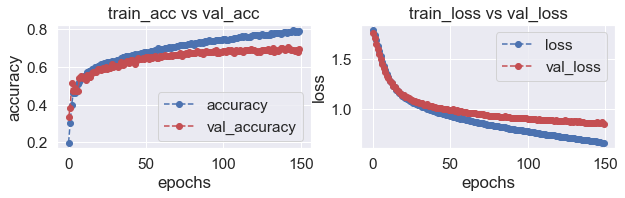

33min 31s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
%%timeit -n1 -r1 
#with tf.device('/CPU:0'):
history = model.fit(train_images, train_labels, batch_size=32, epochs=150, validation_split = 0.2)
def plot_accuracy_loss(history):

    #Plot the accuracy and the loss during the training of the nn.

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [14]:
test_loss = model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 49ms/step - loss: 0.8777 - accuracy: 0.6736


In [15]:
#test_loss = model.evaluate(test_images, test_labels)
from sklearn.metrics import confusion_matrix , classification_report
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

print("Classification Report: \n", classification_report(test_labels, pred_labels))

5/5 [==============================] - 1s 101ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.83      0.79      0.81        24
           2       0.57      0.67      0.62        24
           3       0.61      0.79      0.69        24
           4       0.64      0.29      0.40        24
           5       0.69      0.83      0.75        24

    accuracy                           0.67       144
   macro avg       0.68      0.67      0.66       144
weighted avg       0.68      0.67      0.66       144



In [15]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

model = VGG16(weights= 'imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [16]:
train_feature = model.predict(train_images)
test_feature = model.predict(test_images)

94/94 [==============================] - 175s 2s/step


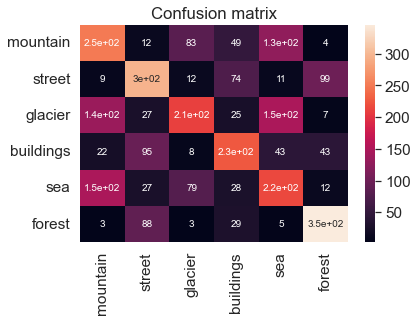

In [19]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [7]:
train = r'C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\train'

In [8]:
test = r'C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\seg_test'

In [14]:
train_processed_224  = tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    batch_size = 32,
                                                                    image_size = (224,224),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "training")
validation_processed_224 = tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    batch_size = 32,
                                                                    image_size = (224,224),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "validation")

train_processed_331  = tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    batch_size = 32,
                                                                    image_size = (331,331),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "training")
validation_processed_331 = tf.keras.preprocessing.image_dataset_from_directory(train, 
                                                                    batch_size = 32,
                                                                    image_size = (331,331),
                                                                    shuffle = True, 
                                                                    seed = 505,
                                                                    validation_split=0.1,
                                                                    subset = "validation")

Found 1800 files belonging to 6 classes.
Using 1620 files for training.
Found 1800 files belonging to 6 classes.
Using 180 files for validation.
Found 1800 files belonging to 6 classes.
Using 1620 files for training.
Found 1800 files belonging to 6 classes.
Using 180 files for validation.


In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=505,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
data_train = data_train.map(lambda x,y: (x/255, y))

data_test = tf.keras.utils.image_dataset_from_directory(
    test,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
data_test = data_test.map(lambda x,y: (x/255, y))

Found 1800 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [11]:
train_size = int(len(data_train)*.8)
val_size = int(len(data_train)*.2)
train_size
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
val_size

11

In [12]:
input_shape = (224, 224, 3)

In [13]:
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, ... up to  7
# Higher the number, the more complex the model is. and the larger resolutions it  can handle, but  the more GPU memory it will need
# loading pretrained conv base model
#input_shape is (height, width, number of channels) for images
conv_base = EfficientNetB6(weights="imagenet", include_top=False, input_shape=input_shape)

In [18]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
model.add(layers.Dropout(0.2))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(6, activation="softmax", name="fc_out"))
conv_base.trainable = False

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=["acc"],
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional)  (None, 7, 7, 2304)       40960143  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2304)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2304)              0         
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               295040    
                                                                 
 fc_out (Dense)              (None, 6)                 774       
                                                                 
Total params: 41,255,957
Trainable params: 295,814
Non

In [20]:
history = model.fit(train, batch_size=32, epochs=25, validation_data=val)

Epoch 1/25
45/45 [==============================] - 64s 962ms/step - loss: 5.4211 - acc: 0.1785 - val_loss: 2.8410 - val_acc: 0.1364
Epoch 2/25
45/45 [==============================] - 39s 863ms/step - loss: 5.1781 - acc: 0.1715 - val_loss: 2.5880 - val_acc: 0.2017
Epoch 3/25
45/45 [==============================] - 39s 855ms/step - loss: 4.8432 - acc: 0.1701 - val_loss: 2.2975 - val_acc: 0.1534
Epoch 4/25
45/45 [==============================] - 39s 855ms/step - loss: 4.4322 - acc: 0.1778 - val_loss: 2.2210 - val_acc: 0.1790
Epoch 5/25
45/45 [==============================] - 39s 862ms/step - loss: 4.2130 - acc: 0.1681 - val_loss: 1.9970 - val_acc: 0.1534
Epoch 6/25
45/45 [==============================] - 39s 858ms/step - loss: 4.0169 - acc: 0.1722 - val_loss: 2.0771 - val_acc: 0.1591
Epoch 7/25
45/45 [==============================] - 39s 858ms/step - loss: 3.6595 - acc: 0.1701 - val_loss: 1.8534 - val_acc: 0.1619
Epoch 8/25
45/45 [==============================] - 39s 855ms/step - 

In [15]:
# (train, validation), metadata = tfds.load('cats_vs_dogs', split=['train[:70%]', 'train[70%:]'], with_info=True, as_supervised=True)

# Number of training examples and labels
num_train = len(train_processed_224)
num_validation = len(validation_processed_224)
#num_classes = len(Name)
num_iterations = int(num_train/batch_size)

# # Print important info
# print(f'Num train images: {num_train} \
#         \nNum validation images: {num_validation} \
#         \nNum classes: {num_classes} \
#         \nNum iterations per epoch: {num_iterations}')

In [16]:
'''def normalize_img(image, label, img_size):
    # Resize image to the desired img_size and normalize it
    # One hot encode the label
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255
    label = tf.one_hot(label, depth=6)
    return image, label
    
def preprocess_data(train, validation, batch_size, img_size):
    # Apply the normalize_img function on all train and validation data and create batches
    train_processed = train.map(lambda image, label: normalize_img(image, label, img_size))
    
    # If your data is already batched (eg, when using the image_dataset_from_directory function), remove .batch(batch_size)
    train_processed = train_processed.repeat()
    
    validation_processed = validation.map(lambda image, label: normalize_img(image, label, img_size))
    
    # If your data is already batched (eg, when using the image_dataset_from_directory function), remove .batch(batch_size)
    validation_processed = validation_processed
    
    return train_processed, validation_processed
    
# Run preprocessing
train_processed_224, validation_processed_224 = preprocess_data(train_processed_224, validation_processed_224, batch_size, img_size=[224,224])
train_processed_331, validation_processed_331 = preprocess_data(train_processed_331, validation_processed_331, batch_size, img_size=[331,331])'''

'def normalize_img(image, label, img_size):\n    # Resize image to the desired img_size and normalize it\n    # One hot encode the label\n    image = tf.image.resize(image, img_size)\n    image = tf.cast(image, tf.float32) / 255\n    label = tf.one_hot(label, depth=6)\n    return image, label\n    \ndef preprocess_data(train, validation, batch_size, img_size):\n    # Apply the normalize_img function on all train and validation data and create batches\n    train_processed = train.map(lambda image, label: normalize_img(image, label, img_size))\n    \n    # If your data is already batched (eg, when using the image_dataset_from_directory function), remove .batch(batch_size)\n    train_processed = train_processed.repeat()\n    \n    validation_processed = validation.map(lambda image, label: normalize_img(image, label, img_size))\n    \n    # If your data is already batched (eg, when using the image_dataset_from_directory function), remove .batch(batch_size)\n    validation_processed = valid

In [17]:
# Loop over each model available in Keras
model_benchmarks = {'model_name': [], 'num_model_params': [], 'validation_accuracy': []}

for model_name, model in tqdm(model_dictionary.items()):
    # Special handling for "NASNetLarge" since it requires input images with size (331,331)
    if 'NASNetLarge' in model_name:
        input_shape=(331,331,3)
        train_processed = train_processed_331
        validation_processed = validation_processed_331
    else:
        input_shape=(224,224,3)
        train_processed = train_processed_224
        validation_processed = validation_processed_224
        
    # load the pre-trained model with global average pooling as the last layer and freeze the model weights
    pre_trained_model = model(include_top=False, pooling='avg', input_shape=input_shape)
    pre_trained_model.trainable = False
    
    # custom modifications on top of pre-trained model and fit
    clf_model = tf.keras.models.Sequential()
    clf_model.add(pre_trained_model)
    # clf_model.add(tf.keras.layers.BatchNormalization())
    # clf_model.add(Dropout(rate=.45))
    clf_model.add(tf.keras.layers.Dense(90, activation='softmax'))
    clf_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = clf_model.fit(train_processed, epochs=5, validation_data=validation_processed, steps_per_epoch=num_iterations)

    # Calculate all relevant metrics
    model_benchmarks['model_name'].append(model_name)
    model_benchmarks['num_model_params'].append(pre_trained_model.count_params())
    model_benchmarks['validation_accuracy'].append(history.history['val_accuracy'][-1])

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
1/1 [==============================] - 36s 36s/step - loss: 4.5343 - accuracy: 0.0000e+00 - val_loss: 3.0192 - val_accuracy: 0.1111
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 2.8584 - accuracy: 0.1562 - val_loss: 2.4380 - val_accuracy: 0.2111
Epoch 3/5
1/1 [==============================] - 6s 6s/step - loss: 2.3914 - accuracy: 0.1562 - val_loss: 2.1624 - val_accuracy: 0.2333
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 2.1905 - accuracy: 0.1250 - val_loss: 1.9183 - val_accuracy: 0.4944
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 1.9179 - accuracy: 0.4375 - val_loss: 1.7566 - val_accuracy: 0.5000


  3%|▎         | 1/30 [01:01<29:31, 61.07s/it]

Epoch 1/5
1/1 [==============================] - 40s 40s/step - loss: 4.7045 - accuracy: 0.0000e+00 - val_loss: 2.9685 - val_accuracy: 0.1667
Epoch 2/5
1/1 [==============================] - 10s 10s/step - loss: 2.9239 - accuracy: 0.2188 - val_loss: 2.3904 - val_accuracy: 0.2222
Epoch 3/5
1/1 [==============================] - 10s 10s/step - loss: 2.1980 - accuracy: 0.2500 - val_loss: 2.1555 - val_accuracy: 0.1944
Epoch 4/5
1/1 [==============================] - 10s 10s/step - loss: 2.0757 - accuracy: 0.2188 - val_loss: 1.8831 - val_accuracy: 0.4167
Epoch 5/5
1/1 [==============================] - 10s 10s/step - loss: 1.8559 - accuracy: 0.2500 - val_loss: 1.7497 - val_accuracy: 0.3889


  7%|▋         | 2/30 [02:23<34:24, 73.72s/it]

11847872/11847872 [==============================] - 2s 0us/step
Epoch 1/5
1/1 [==============================] - 12s 12s/step - loss: 4.6671 - accuracy: 0.0000e+00 - val_loss: 4.4260 - val_accuracy: 0.0444
Epoch 2/5
1/1 [==============================] - 1s 720ms/step - loss: 4.4571 - accuracy: 0.0625 - val_loss: 4.2510 - val_accuracy: 0.0722
Epoch 3/5
1/1 [==============================] - 1s 827ms/step - loss: 4.3455 - accuracy: 0.0000e+00 - val_loss: 4.1041 - val_accuracy: 0.0833
Epoch 4/5
1/1 [==============================] - 1s 835ms/step - loss: 4.1000 - accuracy: 0.0625 - val_loss: 3.9717 - val_accuracy: 0.0889
Epoch 5/5
1/1 [==============================] - 1s 829ms/step - loss: 3.9282 - accuracy: 0.0000e+00 - val_loss: 3.8556 - val_accuracy: 0.0944


 10%|█         | 3/30 [02:44<22:15, 49.45s/it]

16437304/16437304 [==============================] - 3s 0us/step
Epoch 1/5
1/1 [==============================] - 15s 15s/step - loss: 4.6159 - accuracy: 0.0312 - val_loss: 4.3028 - val_accuracy: 0.0778
Epoch 2/5
1/1 [==============================] - 1s 917ms/step - loss: 4.2346 - accuracy: 0.1250 - val_loss: 4.1208 - val_accuracy: 0.1611
Epoch 3/5
1/1 [==============================] - 1s 985ms/step - loss: 4.0026 - accuracy: 0.2188 - val_loss: 3.9614 - val_accuracy: 0.2111
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 3.9558 - accuracy: 0.1875 - val_loss: 3.8329 - val_accuracy: 0.2222
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 3.7498 - accuracy: 0.3750 - val_loss: 3.7227 - val_accuracy: 0.2333


 13%|█▎        | 4/30 [03:09<17:17, 39.91s/it]

22555192/22555192 [==============================] - 4s 0us/step
Epoch 1/5
1/1 [==============================] - 14s 14s/step - loss: 4.5171 - accuracy: 0.0000e+00 - val_loss: 3.4440 - val_accuracy: 0.1222
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 3.4520 - accuracy: 0.0938 - val_loss: 2.9791 - val_accuracy: 0.1944
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 2.9752 - accuracy: 0.2188 - val_loss: 2.6730 - val_accuracy: 0.2278
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 2.8282 - accuracy: 0.1875 - val_loss: 2.4775 - val_accuracy: 0.2944
Epoch 5/5
1/1 [==============================] - 1s 995ms/step - loss: 2.5370 - accuracy: 0.2500 - val_loss: 2.3201 - val_accuracy: 0.3222


 17%|█▋        | 5/30 [03:34<14:26, 34.66s/it]

22728936/22728936 [==============================] - 7s 0us/step
Epoch 1/5
1/1 [==============================] - 15s 15s/step - loss: 4.9124 - accuracy: 0.0000e+00 - val_loss: 3.6823 - val_accuracy: 0.1611
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 3.5996 - accuracy: 0.1875 - val_loss: 3.1181 - val_accuracy: 0.2667
Epoch 3/5
1/1 [==============================] - 1s 1s/step - loss: 3.0877 - accuracy: 0.3125 - val_loss: 2.7640 - val_accuracy: 0.2944
Epoch 4/5
1/1 [==============================] - 1s 1s/step - loss: 2.8307 - accuracy: 0.2500 - val_loss: 2.5527 - val_accuracy: 0.3167
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 2.5836 - accuracy: 0.2812 - val_loss: 2.3557 - val_accuracy: 0.3222


 20%|██        | 6/30 [04:04<13:08, 32.85s/it]

42641688/42641688 [==============================] - 10s 0us/step
Epoch 1/5
1/1 [==============================] - 20s 20s/step - loss: 4.6144 - accuracy: 0.0312 - val_loss: 3.5906 - val_accuracy: 0.0944
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 3.5143 - accuracy: 0.1562 - val_loss: 2.9881 - val_accuracy: 0.1111
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 3.0342 - accuracy: 0.0625 - val_loss: 2.6706 - val_accuracy: 0.2278
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 2.6039 - accuracy: 0.3125 - val_loss: 2.4575 - val_accuracy: 0.2167
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 2.3183 - accuracy: 0.2188 - val_loss: 2.2768 - val_accuracy: 0.2833


 23%|██▎       | 7/30 [04:45<13:37, 35.53s/it]

72866768/72866768 [==============================] - 16s 0us/step
Epoch 1/5
1/1 [==============================] - 20s 20s/step - loss: 4.7135 - accuracy: 0.0000e+00 - val_loss: 3.2775 - val_accuracy: 0.0833
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 3.2486 - accuracy: 0.1250 - val_loss: 2.6075 - val_accuracy: 0.1333
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.5789 - accuracy: 0.0625 - val_loss: 2.2656 - val_accuracy: 0.1611
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 2.2327 - accuracy: 0.1562 - val_loss: 2.0461 - val_accuracy: 0.3667
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 2.1312 - accuracy: 0.3750 - val_loss: 1.8751 - val_accuracy: 0.4111


 27%|██▋       | 8/30 [05:34<14:37, 39.90s/it]

79431632/79431632 [==============================] - 18s 0us/step
Epoch 1/5
1/1 [==============================] - 24s 24s/step - loss: 4.6526 - accuracy: 0.0312 - val_loss: 3.4889 - val_accuracy: 0.2611
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 3.4995 - accuracy: 0.2812 - val_loss: 2.8484 - val_accuracy: 0.2500
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.6577 - accuracy: 0.2812 - val_loss: 2.5520 - val_accuracy: 0.2833
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 2.4187 - accuracy: 0.3125 - val_loss: 2.3340 - val_accuracy: 0.3000
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 2.4376 - accuracy: 0.3438 - val_loss: 2.0913 - val_accuracy: 0.3667


 30%|███       | 9/30 [06:30<15:43, 44.93s/it]

118552736/118552736 [==============================] - 26s 0us/step
Epoch 1/5
1/1 [==============================] - 26s 26s/step - loss: 4.7652 - accuracy: 0.0000e+00 - val_loss: 3.4619 - val_accuracy: 0.1889
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 3.4501 - accuracy: 0.1562 - val_loss: 2.8372 - val_accuracy: 0.2500
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 2.7465 - accuracy: 0.3125 - val_loss: 2.5171 - val_accuracy: 0.2333
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 2.4306 - accuracy: 0.2812 - val_loss: 2.2859 - val_accuracy: 0.2556
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 2.2108 - accuracy: 0.3125 - val_loss: 2.0898 - val_accuracy: 0.3444


 33%|███▎      | 10/30 [07:40<17:34, 52.71s/it]

149729968/149729968 [==============================] - 35s 0us/step
Epoch 1/5
1/1 [==============================] - 25s 25s/step - loss: 4.5826 - accuracy: 0.0000e+00 - val_loss: 3.0577 - val_accuracy: 0.1556
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 3.0318 - accuracy: 0.1562 - val_loss: 2.4265 - val_accuracy: 0.3556
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 2.3485 - accuracy: 0.2500 - val_loss: 2.1681 - val_accuracy: 0.2444
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 2.2226 - accuracy: 0.2188 - val_loss: 1.9489 - val_accuracy: 0.3778
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 2.0295 - accuracy: 0.3125 - val_loss: 1.7956 - val_accuracy: 0.4611


 37%|███▋      | 11/30 [09:00<19:18, 60.98s/it]

199541000/199541000 [==============================] - 46s 0us/step
Epoch 1/5
1/1 [==============================] - 28s 28s/step - loss: 4.6094 - accuracy: 0.0000e+00 - val_loss: 3.1202 - val_accuracy: 0.3000
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 3.1929 - accuracy: 0.2500 - val_loss: 2.4597 - val_accuracy: 0.3722
Epoch 3/5
1/1 [==============================] - 5s 5s/step - loss: 2.3749 - accuracy: 0.5312 - val_loss: 2.1452 - val_accuracy: 0.4111
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 2.0022 - accuracy: 0.5312 - val_loss: 1.9680 - val_accuracy: 0.4333
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 1.9709 - accuracy: 0.3750 - val_loss: 1.7761 - val_accuracy: 0.6111


 40%|████      | 12/30 [10:39<21:46, 72.57s/it]

323550176/323550176 [==============================] - 79s 0us/step
Epoch 1/5
1/1 [==============================] - 18s 18s/step - loss: 4.5570 - accuracy: 0.0000e+00 - val_loss: 2.8767 - val_accuracy: 0.2889
Epoch 2/5
1/1 [==============================] - 6s 6s/step - loss: 2.7045 - accuracy: 0.4062 - val_loss: 2.2367 - val_accuracy: 0.2944
Epoch 3/5
1/1 [==============================] - 6s 6s/step - loss: 2.3600 - accuracy: 0.3125 - val_loss: 1.9471 - val_accuracy: 0.4389
Epoch 4/5
1/1 [==============================] - 6s 6s/step - loss: 1.9619 - accuracy: 0.4375 - val_loss: 1.7509 - val_accuracy: 0.6056
Epoch 5/5
1/1 [==============================] - 6s 6s/step - loss: 1.9008 - accuracy: 0.4375 - val_loss: 1.6038 - val_accuracy: 0.6389


 43%|████▎     | 13/30 [12:45<25:08, 88.75s/it]

566841248/566841248 [==============================] - 137s 0us/step
Epoch 1/5
1/1 [==============================] - 32s 32s/step - loss: 4.6620 - accuracy: 0.0000e+00 - val_loss: 2.7309 - val_accuracy: 0.3389
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 2.5805 - accuracy: 0.3750 - val_loss: 2.2271 - val_accuracy: 0.3944
Epoch 3/5
1/1 [==============================] - 9s 9s/step - loss: 2.1533 - accuracy: 0.3750 - val_loss: 1.9182 - val_accuracy: 0.5278
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 1.8829 - accuracy: 0.5625 - val_loss: 1.6691 - val_accuracy: 0.6111
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 1.7449 - accuracy: 0.5312 - val_loss: 1.5479 - val_accuracy: 0.6111


 47%|████▋     | 14/30 [16:15<33:27, 125.47s/it]

171446536/171446536 [==============================] - 38s 0us/step
Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 5.4060 - accuracy: 0.0000e+00 - val_loss: 2.4455 - val_accuracy: 0.1333
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 2.3145 - accuracy: 0.1562 - val_loss: 1.9945 - val_accuracy: 0.2889
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 2.0571 - accuracy: 0.1875 - val_loss: 1.8536 - val_accuracy: 0.3667
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 1.8375 - accuracy: 0.2500 - val_loss: 1.5526 - val_accuracy: 0.3778
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 1.4039 - accuracy: 0.4375 - val_loss: 1.2496 - val_accuracy: 0.5611


 50%|█████     | 15/30 [17:18<26:37, 106.53s/it]

171317808/171317808 [==============================] - 48s 0us/step
Epoch 1/5
1/1 [==============================] - 10s 10s/step - loss: 526.5616 - accuracy: 0.0000e+00 - val_loss: 180.5150 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 181.4467 - accuracy: 0.0000e+00 - val_loss: 163.1043 - val_accuracy: 0.1222
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 132.7902 - accuracy: 0.2188 - val_loss: 140.1378 - val_accuracy: 0.0667
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 165.5417 - accuracy: 0.0312 - val_loss: 206.9146 - val_accuracy: 0.1444
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 210.4543 - accuracy: 0.0938 - val_loss: 177.1759 - val_accuracy: 0.1889


 53%|█████▎    | 16/30 [18:31<22:31, 96.55s/it] 

234698864/234698864 [==============================] - 53s 0us/step
Epoch 1/5
1/1 [==============================] - 13s 13s/step - loss: 5.0015 - accuracy: 0.0000e+00 - val_loss: 2.5041 - val_accuracy: 0.1667
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 2.5125 - accuracy: 0.1875 - val_loss: 1.7777 - val_accuracy: 0.3500
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 1.6234 - accuracy: 0.3750 - val_loss: 1.5259 - val_accuracy: 0.4111
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 1.3614 - accuracy: 0.4688 - val_loss: 1.2258 - val_accuracy: 0.5556
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 0.9316 - accuracy: 0.6250 - val_loss: 1.1871 - val_accuracy: 0.6111


 57%|█████▋    | 17/30 [19:56<20:09, 93.01s/it]

234545216/234545216 [==============================] - 64s 0us/step
Epoch 1/5
1/1 [==============================] - 13s 13s/step - loss: 845.8701 - accuracy: 0.0000e+00 - val_loss: 344.8332 - val_accuracy: 0.1500
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 260.4129 - accuracy: 0.1875 - val_loss: 483.3873 - val_accuracy: 0.1500
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 453.9098 - accuracy: 0.0625 - val_loss: 580.5279 - val_accuracy: 0.1278
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 462.7426 - accuracy: 0.3125 - val_loss: 483.1813 - val_accuracy: 0.3000
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 416.3348 - accuracy: 0.3438 - val_loss: 346.3429 - val_accuracy: 0.1556


 60%|██████    | 18/30 [21:33<18:49, 94.10s/it]

94765736/94765736 [==============================] - 23s 0us/step
Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 5.9222 - accuracy: 0.0000e+00 - val_loss: 2.5338 - val_accuracy: 0.1611
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 2.7071 - accuracy: 0.1250 - val_loss: 1.8702 - val_accuracy: 0.3500
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 1.9466 - accuracy: 0.3438 - val_loss: 1.7179 - val_accuracy: 0.3611
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 1.7904 - accuracy: 0.3125 - val_loss: 1.4155 - val_accuracy: 0.4778
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 1.3464 - accuracy: 0.4688 - val_loss: 1.2338 - val_accuracy: 0.5722


 63%|██████▎   | 19/30 [22:10<14:06, 76.96s/it]

94668760/94668760 [==============================] - 24s 0us/step
Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 380.0947 - accuracy: 0.0000e+00 - val_loss: 134.1148 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 138.0147 - accuracy: 0.0000e+00 - val_loss: 90.3760 - val_accuracy: 0.2389
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 77.4495 - accuracy: 0.2500 - val_loss: 52.6419 - val_accuracy: 0.2556
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 46.6620 - accuracy: 0.2500 - val_loss: 60.4772 - val_accuracy: 0.0944
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 51.3948 - accuracy: 0.2188 - val_loss: 52.5042 - val_accuracy: 0.2500


 67%|██████▋   | 20/30 [22:50<10:59, 65.92s/it]

247817848/247817848 [==============================] - 60s 0us/step
Epoch 1/5
1/1 [==============================] - 14s 14s/step - loss: 4.6698 - accuracy: 0.0312 - val_loss: 2.8050 - val_accuracy: 0.2222
Epoch 2/5
1/1 [==============================] - 3s 3s/step - loss: 2.9708 - accuracy: 0.1562 - val_loss: 2.0957 - val_accuracy: 0.3667
Epoch 3/5
1/1 [==============================] - 3s 3s/step - loss: 2.2792 - accuracy: 0.2188 - val_loss: 1.7320 - val_accuracy: 0.5167
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 1.7088 - accuracy: 0.4062 - val_loss: 1.4870 - val_accuracy: 0.5667
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 1.6039 - accuracy: 0.4375 - val_loss: 1.2620 - val_accuracy: 0.6778


 70%|███████   | 21/30 [24:22<11:03, 73.77s/it]

340541616/340541616 [==============================] - 74s 0us/step
Epoch 1/5
1/1 [==============================] - 18s 18s/step - loss: 4.7908 - accuracy: 0.0000e+00 - val_loss: 2.7075 - val_accuracy: 0.2056
Epoch 2/5
1/1 [==============================] - 4s 4s/step - loss: 2.8456 - accuracy: 0.1562 - val_loss: 2.0399 - val_accuracy: 0.4000
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 1.8839 - accuracy: 0.4062 - val_loss: 1.6639 - val_accuracy: 0.4889
Epoch 4/5
1/1 [==============================] - 4s 4s/step - loss: 1.8042 - accuracy: 0.3750 - val_loss: 1.4349 - val_accuracy: 0.5500
Epoch 5/5
1/1 [==============================] - 4s 4s/step - loss: 1.4610 - accuracy: 0.5625 - val_loss: 1.2600 - val_accuracy: 0.6222


 73%|███████▎  | 22/30 [26:19<11:34, 86.85s/it]

367574712/367574712 [==============================] - 108s 0us/step
Epoch 1/5
1/1 [==============================] - 27s 27s/step - loss: 4.8751 - accuracy: 0.0000e+00 - val_loss: 2.7488 - val_accuracy: 0.2056
Epoch 2/5
1/1 [==============================] - 5s 5s/step - loss: 2.6207 - accuracy: 0.1875 - val_loss: 2.0989 - val_accuracy: 0.3389
Epoch 3/5
1/1 [==============================] - 5s 5s/step - loss: 1.9982 - accuracy: 0.2188 - val_loss: 1.7877 - val_accuracy: 0.4444
Epoch 4/5
1/1 [==============================] - 5s 5s/step - loss: 1.6869 - accuracy: 0.3438 - val_loss: 1.4988 - val_accuracy: 0.6278
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 1.4572 - accuracy: 0.5938 - val_loss: 1.3290 - val_accuracy: 0.6389


 77%|███████▋  | 23/30 [29:05<12:54, 110.63s/it]

515221032/515221032 [==============================] - 118s 0us/step
Epoch 1/5
1/1 [==============================] - 36s 36s/step - loss: 4.0011 - accuracy: 0.0938 - val_loss: 2.3354 - val_accuracy: 0.3944
Epoch 2/5
1/1 [==============================] - 7s 7s/step - loss: 2.2981 - accuracy: 0.3438 - val_loss: 1.7676 - val_accuracy: 0.5500
Epoch 3/5
1/1 [==============================] - 7s 7s/step - loss: 1.4715 - accuracy: 0.6562 - val_loss: 1.4121 - val_accuracy: 0.6778
Epoch 4/5
1/1 [==============================] - 7s 7s/step - loss: 1.2952 - accuracy: 0.7812 - val_loss: 1.2166 - val_accuracy: 0.6889
Epoch 5/5
1/1 [==============================] - 7s 7s/step - loss: 0.9331 - accuracy: 0.7812 - val_loss: 1.0959 - val_accuracy: 0.7111


 80%|████████  | 24/30 [32:22<13:38, 136.50s/it]

652710160/652710160 [==============================] - 303s 0us/step
Epoch 1/5
1/1 [==============================] - 46s 46s/step - loss: 4.8050 - accuracy: 0.0000e+00 - val_loss: 2.8103 - val_accuracy: 0.1611
Epoch 2/5
1/1 [==============================] - 9s 9s/step - loss: 2.5377 - accuracy: 0.2188 - val_loss: 2.1868 - val_accuracy: 0.2722
Epoch 3/5
1/1 [==============================] - 9s 9s/step - loss: 2.0648 - accuracy: 0.2500 - val_loss: 1.8142 - val_accuracy: 0.4167
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 1.8521 - accuracy: 0.4688 - val_loss: 1.5006 - val_accuracy: 0.5944
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 1.6436 - accuracy: 0.5625 - val_loss: 1.3080 - val_accuracy: 0.6389


 83%|████████▎ | 25/30 [39:06<18:03, 216.68s/it]

765419480/765419480 [==============================] - 302s 0us/step
Epoch 1/5
1/1 [==============================] - 55s 55s/step - loss: 4.6761 - accuracy: 0.0000e+00 - val_loss: 2.8635 - val_accuracy: 0.1889
Epoch 2/5
1/1 [==============================] - 11s 11s/step - loss: 2.8598 - accuracy: 0.2500 - val_loss: 2.3122 - val_accuracy: 0.2833
Epoch 3/5
1/1 [==============================] - 11s 11s/step - loss: 2.2312 - accuracy: 0.3125 - val_loss: 1.8581 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 11s 11s/step - loss: 1.6062 - accuracy: 0.5938 - val_loss: 1.5620 - val_accuracy: 0.5667
Epoch 5/5
1/1 [==============================] - 11s 11s/step - loss: 1.5524 - accuracy: 0.5000 - val_loss: 1.3689 - val_accuracy: 0.6056


 87%|████████▋ | 26/30 [46:10<18:35, 278.81s/it]

135360144/135360144 [==============================] - 29s 0us/step
Epoch 1/5
1/1 [==============================] - 9s 9s/step - loss: 4.4876 - accuracy: 0.0312 - val_loss: 2.7679 - val_accuracy: 0.1944
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 2.7700 - accuracy: 0.1250 - val_loss: 2.1187 - val_accuracy: 0.2833
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.0301 - accuracy: 0.4062 - val_loss: 1.7167 - val_accuracy: 0.5111
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 1.7475 - accuracy: 0.4688 - val_loss: 1.4173 - val_accuracy: 0.6056
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 1.3915 - accuracy: 0.6250 - val_loss: 1.1843 - val_accuracy: 0.7389


 90%|█████████ | 27/30 [46:59<10:30, 210.05s/it]

Epoch 1/5


 90%|█████████ | 27/30 [47:14<05:14, 104.99s/it]


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_27/vgg16/block1_conv2/Conv2D' defined at (most recent call last):
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\abulf\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\abulf\AppData\Local\Temp\ipykernel_13368\43886114.py", line 26, in <cell line: 4>
      history = clf_model.fit(train_processed, epochs=5, validation_data=validation_processed, steps_per_epoch=num_iterations)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\keras\layers\convolutional\base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_27/vgg16/block1_conv2/Conv2D'
OOM when allocating tensor with shape[32,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_27/vgg16/block1_conv2/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_778093]

In [17]:
# Convert Results to DataFrame for easy viewing
benchmark_df = pd.DataFrame(model_benchmarks)

# sort in ascending order of num_model_params column
benchmark_df.sort_values('validation_accuracy', inplace=True, ascending=False)

benchmark_df

,model_name,num_model_params,validation_accuracy
10,EfficientNetB7,64097687,0.788889
9,EfficientNetB6,40960143,0.772222
7,EfficientNetB4,17673823,0.750000
13,EfficientNetV2B2,8769374,0.722222
6,EfficientNetB3,10783535,0.722222
14,EfficientNetV2B3,12930622,0.705556
16,EfficientNetV2M,53150388,0.694444
8,EfficientNetB5,28513527,0.677778
11,EfficientNetV2B0,5919312,0.650000
17,EfficientNetV2S,20331360,0.633333


In [20]:
# Convert Results to DataFrame for easy viewing
benchmark_df = pd.DataFrame(model_benchmarks)

# sort in ascending order of num_model_params column
benchmark_df.sort_values('validation_accuracy', inplace=True, ascending=False)

benchmark_df

,model_name,num_model_params,validation_accuracy
11,RegNetX120,43961440,0.538889
12,RegNetX160,52340704,0.533333
9,RegNetX064,24658464,0.433333
8,RegNetX040,20833312,0.422222
10,RegNetX080,37742112,0.400000
4,RegNetX006,5700320,0.350000
5,RegNetX008,6623968,0.316667
6,RegNetX016,8320640,0.316667
0,NASNetLarge,84916818,0.288889
2,RegNetX002,2336640,0.283333


In [18]:
# Convert Results to DataFrame for easy viewing
benchmark_df = pd.DataFrame(model_benchmarks)

# sort in ascending order of num_model_params column
benchmark_df.sort_values('validation_accuracy', inplace=True, ascending=False)

benchmark_df

,model_name,num_model_params,validation_accuracy
26,ResNetRS50,33696288,0.738889
23,ResNetRS270,128055520,0.711111
20,ResNetRS101,61675296,0.677778
24,ResNetRS350,162219360,0.638889
22,ResNetRS200,91337248,0.638889
12,RegNetY160,80687956,0.638889
21,ResNetRS152,84724256,0.622222
11,RegNetY120,49677928,0.611111
16,ResNet152,58370944,0.611111
13,RegNetY320,141492058,0.611111


In [7]:
'''data_train = tf.keras.utils.image_dataset_from_directory(
    train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)'''

Found 14034 files belonging to 6 classes.


In [8]:
class_names = train_processed_224.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


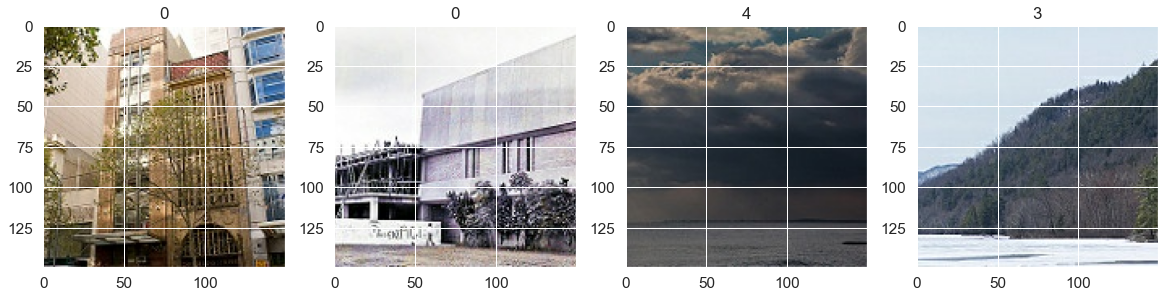

In [9]:
'''data_iterator_train = data_train.as_numpy_iterator()
batch_train = data_iterator_train.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_train[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_train[1][idx])'''

In [10]:
'''data_train = data_train.map(lambda x,y: (x/255, y))
print(len(batch_train))
data_train.as_numpy_iterator().next()'''

2


(array([[[[0.78431374, 0.8117647 , 0.8352941 ],
          [0.78039217, 0.80784315, 0.83137256],
          [0.78039217, 0.80784315, 0.83137256],
          ...,
          [0.7137255 , 0.7647059 , 0.79607844],
          [0.72156864, 0.7607843 , 0.79607844],
          [0.72156864, 0.7607843 , 0.79607844]],
 
         [[0.7764706 , 0.8039216 , 0.827451  ],
          [0.7764706 , 0.8039216 , 0.827451  ],
          [0.7764706 , 0.8039216 , 0.827451  ],
          ...,
          [0.72156864, 0.77254903, 0.8039216 ],
          [0.7294118 , 0.76862746, 0.8039216 ],
          [0.7294118 , 0.76862746, 0.8039216 ]],
 
         [[0.76862746, 0.8039216 , 0.8235294 ],
          [0.77254903, 0.80784315, 0.827451  ],
          [0.77254903, 0.80784315, 0.8352941 ],
          ...,
          [0.7372549 , 0.78039217, 0.8039216 ],
          [0.7411765 , 0.7764706 , 0.8039216 ],
          [0.7411765 , 0.7764706 , 0.8039216 ]],
 
         ...,
 
         [[0.        , 0.10196079, 0.        ],
          [0.12941

In [11]:
'''data_test = tf.keras.utils.image_dataset_from_directory(
    test,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)'''

Found 3000 files belonging to 6 classes.


(array([[[[0.60784316, 0.65882355, 0.69411767],
          [0.60784316, 0.65882355, 0.69411767],
          [0.6117647 , 0.6627451 , 0.69803923],
          ...,
          [0.58431375, 0.6509804 , 0.68235296],
          [0.58431375, 0.6509804 , 0.68235296],
          [0.5882353 , 0.654902  , 0.6862745 ]],
 
         [[0.60784316, 0.65882355, 0.69411767],
          [0.60784316, 0.65882355, 0.69411767],
          [0.6117647 , 0.6627451 , 0.69803923],
          ...,
          [0.5882353 , 0.654902  , 0.6862745 ],
          [0.5882353 , 0.654902  , 0.6862745 ],
          [0.58431375, 0.6509804 , 0.68235296]],
 
         [[0.6117647 , 0.6627451 , 0.69803923],
          [0.6117647 , 0.6627451 , 0.69803923],
          [0.6117647 , 0.6627451 , 0.69803923],
          ...,
          [0.5882353 , 0.654902  , 0.6862745 ],
          [0.5882353 , 0.654902  , 0.6862745 ],
          [0.58431375, 0.6509804 , 0.68235296]],
 
         ...,
 
         [[0.34117648, 0.45490196, 0.47058824],
          [0.32941

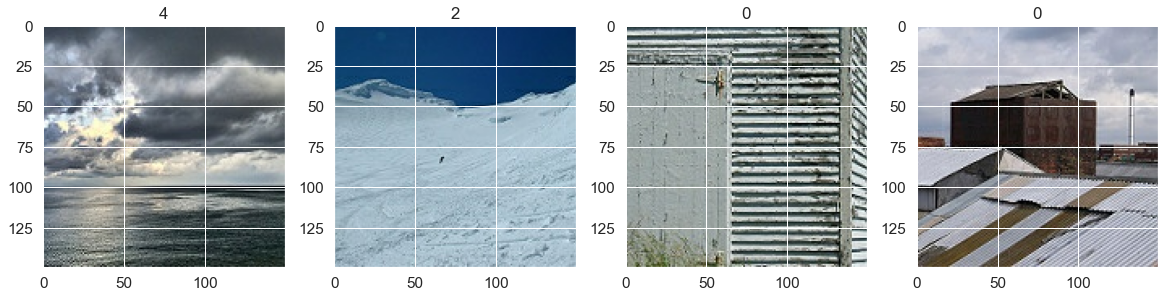

In [12]:
data_iterator_test = data_test.as_numpy_iterator()
batch_test = data_iterator_test.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_test[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_test[1][idx])

data_test = data_test.map(lambda x,y: (x/255, y))
data_test.as_numpy_iterator().next()

In [13]:
len(batch_test)

2

In [14]:
train_size = int(len(data_train)*.8)
val_size = int(len(data_train)*.2)
train_size
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
val_size

176

In [15]:
train = data_train.take(train_size)
val = data_train.skip(train_size).take(val_size)
val_size

44

In [21]:
test_label = np.concatenate([y for x, y in data_test], axis=0)
print(test_label.shape)
'''data_copy = np.zeros(test_label.shape[:-1])
print(data_copy.shape)
print(data_copy)
for c in range(test_label.shape[-1]):
    img_c = test_label[..., c]
    data_copy[img_c == 1] = c
data_copy = data_copy.astype(int)
data_copy'''

(3000,)


'data_copy = np.zeros(test_label.shape[:-1])\nprint(data_copy.shape)\nprint(data_copy)\nfor c in range(test_label.shape[-1]):\n    img_c = test_label[..., c]\n    data_copy[img_c == 1] = c\ndata_copy = data_copy.astype(int)\ndata_copy'

In [17]:
test_label = np.concatenate([y for x, y in data_test], axis=0)
print(test_label)

[5 2 2 ... 0 4 4]


In [18]:
x = np.concatenate([x for x, y in data_test], axis=0)
print(x.shape)

(3000, 150, 150, 3)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [21]:
logdir = r'C:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\data\Data\log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
176/176 [==============================] - 29s 118ms/step - loss: 0.9972 - accuracy: 0.6123 - val_loss: 0.7443 - val_accuracy: 0.7256
Epoch 2/25
176/176 [==============================] - 19s 106ms/step - loss: 0.6614 - accuracy: 0.7600 - val_loss: 0.7274 - val_accuracy: 0.7292
Epoch 3/25
176/176 [==============================] - 20s 111ms/step - loss: 0.5413 - accuracy: 0.8052 - val_loss: 0.6126 - val_accuracy: 0.7675
Epoch 4/25
176/176 [==============================] - 20s 112ms/step - loss: 0.4447 - accuracy: 0.8400 - val_loss: 0.5681 - val_accuracy: 0.7971
Epoch 5/25
176/176 [==============================] - 20s 110ms/step - loss: 0.3540 - accuracy: 0.8738 - val_loss: 0.5271 - val_accuracy: 0.8094
Epoch 6/25
176/176 [==============================] - 19s 106ms/step - loss: 0.2695 - accuracy: 0.9034 - val_loss: 0.5807 - val_accuracy: 0.8144
Epoch 7/25
176/176 [==============================] - 19s 106ms/step - loss: 0.2142 - accuracy: 0.9275 - val_loss: 0.5380 - val_ac

In [22]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

KeyError: 'accuracy'

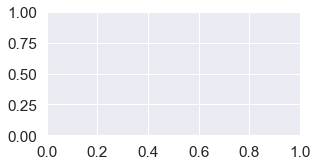

In [24]:
plot_accuracy_loss(history)

In [25]:
#test_loss = model.evaluate(x, test_label)
from sklearn.metrics import confusion_matrix , classification_report
predictions = model.predict(data_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

print("Classification Report: \n", classification_report(test_label, pred_labels))

47/47 [==============================] - 65s 1s/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       437
           1       0.13      0.05      0.07       474
           2       0.00      0.00      0.00       553
           3       0.18      0.95      0.30       525
           4       0.00      0.00      0.00       510
           5       0.00      0.00      0.00       501

    accuracy                           0.17      3000
   macro avg       0.05      0.17      0.06      3000
weighted avg       0.05      0.17      0.06      3000



c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalCrossentropy, Accuracy
pre = Precision()
re = Recall()
cc = CategoricalCrossentropy()
acc = Accuracy()
for batch in data_test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    cc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result(), cc.result())

In [28]:
y_pred=model.predict(data_test)
print(y_pred)
print(y_pred.shape)

94/94 [==============================] - 5s 48ms/step
[[2.85287391e-33 1.00000000e+00 4.09464878e-27 4.21968120e-35
  9.45712792e-38 0.00000000e+00]
 [3.28941554e-19 3.09888058e-18 2.24656299e-17 6.74235147e-12
  1.00000000e+00 3.69228775e-18]
 [4.22252896e-07 8.05271174e-14 1.41902804e-01 8.33120704e-01
  2.49761119e-02 3.92500787e-09]
 ...
 [1.04333076e-03 3.18309967e-13 4.92947811e-06 5.47762692e-01
  4.51140791e-01 4.82207215e-05]
 [2.38548514e-10 1.06908888e-15 2.86885229e-17 8.86431826e-29
  7.48962372e-24 1.00000000e+00]
 [2.97368223e-13 1.15889954e-07 9.07657792e-13 9.99996305e-01
  3.59038768e-06 1.71101481e-15]]
(3000, 6)


In [29]:
test_label = np.concatenate([y for x, y in data_test], axis=0)
print(test_label.shape)
data_copy = np.zeros(test_label.shape[:-1])
print(data_copy.shape)
print(data_copy)
for c in range(test_label.shape[-1]):
    img_c = test_label[..., c]
    data_copy[img_c == 1] = c
data_copy = data_copy.astype(int)
data_copy

In [31]:
test_label.shape

(3000, 6)

In [32]:
y_pred = y_pred.argmax(axis=1)

In [34]:
y_pred.shape

(3000,)

In [36]:
test_label.shape

(3000, 6)

In [38]:
data_copy = np.zeros(test_label.shape[:-1])
data_copy.shape

(3000,)

In [39]:
data_copy = np.zeros(test_label.shape[:-1])
for c in range(test_label.shape[-1]):
    img_c = test_label[..., c]
    data_copy[img_c == 1] = c

In [42]:
data_copy = data_copy.astype(int)
data_copy

array([0, 1, 4, ..., 4, 2, 5])

In [41]:
y_pred

array([1, 4, 3, ..., 3, 5, 3], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(data_copy, y_pred,normalize='true')

<Figure size 720x720 with 0 Axes>

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(data_copy, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.16      0.15      0.15       437
           1       0.11      0.11      0.11       474
           2       0.18      0.18      0.18       553
           3       0.17      0.19      0.18       525
           4       0.16      0.15      0.15       510
           5       0.18      0.19      0.18       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000

